# Example of distances

This notebook calculate distances between several _jobs.csv as an example.

In [1]:
# Initialization
import pandas as pd
from evalys.jobset import JobSet
from evalys.visu.gantt import plot_gantt

three_jobs =            "test/input/3jobs.csv"
three_jobs_w_session =  "test/input/3jobs_w_sessions.csv"
three_jobs_zero =       "test/input/3jobs_zeros.csv"
mc_10days_a60 =         "test/input/mc_10days_a60_jobs.csv"
mc_10days_m60 =         "test/input/mc_10days_m60_jobs.csv"
mc_10days_rigid =       "test/input/mc_10days_rigid_jobs.csv"

Vizualize the useful columns of a jobs.csv:

In [3]:
out1 = pd.read_csv(mc_10days_a60)

# Select
desired_cols = ["job_id", "submission_time", "starting_time", "finish_time", "success"]
select = out1.loc[:, desired_cols]

# Clean job_id
select.job_id = select.job_id.astype(str)
select.job_id = select.job_id.str.split(':', expand=True)[0]
select.job_id = select.job_id.astype(int)

select

job_id  submission_time  starting_time  finish_time  success
0      1216          55532.0        55532.0      55894.0        1
1       247           9327.0         9327.0      66429.0        1
2      1242          56876.0        56876.0      66496.0        1
3      1434          66504.0        66504.0      67496.0        1
4      1438          66506.0        66506.0      69764.0        1
..      ...              ...            ...          ...      ...
319   18943         643942.0       643942.0     954600.0        1
320   18945         643943.0       643943.0     958295.0        1
321   21862         753752.0       753752.0     960982.0        1
322   18944         643942.0       643942.0     961174.0        1
323   21995         760446.0       760446.0    1031099.0        1

[324 rows x 5 columns]

## With mock files
Visualize our two mock files 3jobs and 3jobs_w_sessions:

/home/mael/.local/lib/python3.10/site-packages/evalys/visu/core.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
/home/mael/.local/lib/python3.10/site-packages/evalys/visu/core.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


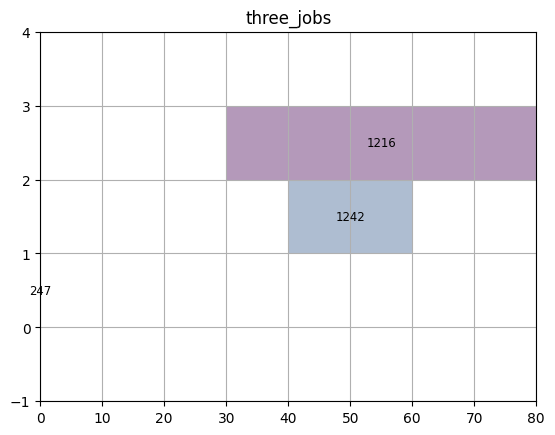

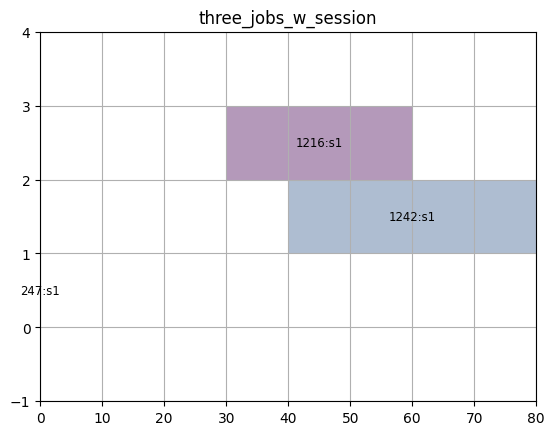

In [3]:
plot_gantt(JobSet.from_csv(three_jobs), title="three_jobs")
plot_gantt(JobSet.from_csv(three_jobs_w_session), title="three_jobs_w_session")

In [6]:
!python3 distance_batsim_output.py {three_jobs} {three_jobs_w_session} --all

{
    "submission_time": {
        "euclidean": 0.0,
        "normalized_euclidean": 0.0,
        "lateness": 0.0
    },
    "starting_time": {
        "euclidean": 0.0,
        "normalized_euclidean": 0.0,
        "lateness": 0.0
    },
    "finish_time": {
        "euclidean": 28.284271247461902,
        "normalized_euclidean": 0.08000000000000002,
        "lateness": 0.0
    }
}


In [7]:
!python3 distance_batsim_output.py {three_jobs} {three_jobs_zero} --all

{
    "submission_time": {
        "euclidean": 50.0,
        "normalized_euclidean": null,
        "lateness": -70.0
    },
    "starting_time": {
        "euclidean": 50.0,
        "normalized_euclidean": null,
        "lateness": -70.0
    },
    "finish_time": {
        "euclidean": 100.0,
        "normalized_euclidean": null,
        "lateness": -140.0
    }
}


In [8]:
!python3 distance_batsim_output.py {mc_10days_a60} {mc_10days_m60} --all

{
    "submission_time": {
        "euclidean": 172.1394783308001,
        "normalized_euclidean": 2.739806304756353e-10,
        "lateness": 2254.0
    },
    "starting_time": {
        "euclidean": 172.1394783308001,
        "normalized_euclidean": 2.739806304756353e-10,
        "lateness": 2254.0
    },
    "finish_time": {
        "euclidean": 172.1394783308001,
        "normalized_euclidean": 2.3852456580198333e-10,
        "lateness": 2254.0
    }
}


In [9]:
!python3 distance_batsim_output.py {mc_10days_a60} {mc_10days_rigid} --all

{
    "submission_time": {
        "euclidean": 241.15762480170517,
        "normalized_euclidean": 5.377222025784075e-10,
        "lateness": 3311.0
    },
    "starting_time": {
        "euclidean": 241.15762480170517,
        "normalized_euclidean": 5.377222025784075e-10,
        "lateness": 3311.0
    },
    "finish_time": {
        "euclidean": 255.14897609044016,
        "normalized_euclidean": 5.240304046302593e-10,
        "lateness": 3633.0
    }
}
